Part 1, 2, & 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('/content/impact_of_remote_work_mental_health.csv')

print(df.head())          # First few rows
print(df.info())          # Get info about the DataFrame
print(df.describe())      # Get summary statistics

Saving impact_of_remote_work_mental_health.csv to impact_of_remote_work_mental_health (1).csv
  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Me

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna()

# Slicing the DataFrame
subset_df = df.iloc[0:10]  # Get the first 10 rows

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


Count Summary of Stress Levels by Work Location:
Stress_Level     1    2    3
Work_Location               
Hybrid         543  545  561
Onsite         555  547  535
Remote         547  577  590

Median Stress Level (Remote): 2.0
Median Stress Level (Onsite): 2.0


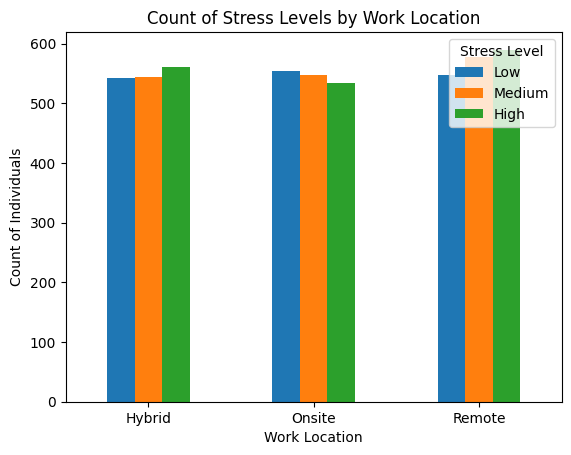

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/impact_of_remote_work_mental_health.csv')

# Define a mapping for stress levels
stress_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Apply the mapping to the Stress_Level column
data['Stress_Level'] = data['Stress_Level'].map(stress_mapping)

# Drop NaN values from Stress_Level after mapping
data.dropna(subset=['Stress_Level'], inplace=True)

# Create count summary for stress levels by work location
count_summary = data.groupby(['Work_Location', 'Stress_Level']).size().unstack(fill_value=0)

# Display the count summary
print("Count Summary of Stress Levels by Work Location:")
print(count_summary)

# Calculate median stress levels
remote_median = data[data['Work_Location'] == 'Remote']['Stress_Level'].median()
onsite_median = data[data['Work_Location'] == 'Onsite']['Stress_Level'].median()

print(f"\nMedian Stress Level (Remote): {remote_median}")
print(f"Median Stress Level (Onsite): {onsite_median}")

# Plotting the counts
count_summary.plot(kind='bar', stacked=False)
plt.title('Count of Stress Levels by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Count of Individuals')
plt.legend(['Low', 'Medium', 'High'],title='Stress Level')
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/impact_of_remote_work_mental_health.csv')

# Define and apply the mapping
mental_health_mapping = {
    'none': 0,
    'depression': 1,
    'anxiety': 2,
    'burnout': 3
}
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].map(mental_health_mapping)

# Check the data after loading
print("First few rows of the data:")
print(data.head())

# Verify mapping and check for NaN values
print("\nUnique values in 'Mental_Health_Condition' after mapping:")
print(data['Mental_Health_Condition'].unique())

print("\nMissing values in each column:")
print(data[['Hours_Worked_Per_Week', 'Mental_Health_Condition']].isna().sum())

# Drop rows with NaN in Mental_Health_Condition
data.dropna(subset=['Mental_Health_Condition'], inplace=True)

# Ensure 'Hours_Worked_Per_Week' is numeric
data['Hours_Worked_Per_Week'] = pd.to_numeric(data['Hours_Worked_Per_Week'], errors='coerce')

# Drop rows with NaN in Hours_Worked_Per_Week after conversion
data.dropna(subset=['Hours_Worked_Per_Week'], inplace=True)

# Perform the grouping
count_summary = data.groupby(['Hours_Worked_Per_Week', 'Mental_Health_Condition']).size().unstack(fill_value=0)

# Display the count summary
print("\nCount Summary of Mental Health Conditions by Hours Worked Per Week:")
print(count_summary)

# Calculate counts with fallback for missing categories
none_count = count_summary.get(0, pd.Series()).sum()
depression_count = count_summary.get(1, pd.Series()).sum()
anxiety_count = count_summary.get(2, pd.Series()).sum()
burnout_count = count_summary.get(3, pd.Series()).sum()

print(f"\nCount of Mental Health Conditions (All Hours Worked):")
print(f"None: {none_count}, Depression: {depression_count}, Anxiety: {anxiety_count}, Burnout: {burnout_count}")

# Plot the data if count_summary is not empty
count_summary.plot(kind='bar', stacked=True)
plt.title('Count of Mental Health Conditions by Hours Worked Per Week')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Count of Individuals')
plt.legend(['None', 'Depression', 'Anxiety', 'Burnout'], title='Mental Health Condition')
plt.xticks(rotation=0)
plt.show()


First few rows of the data:
  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1   

TypeError: no numeric data to plot

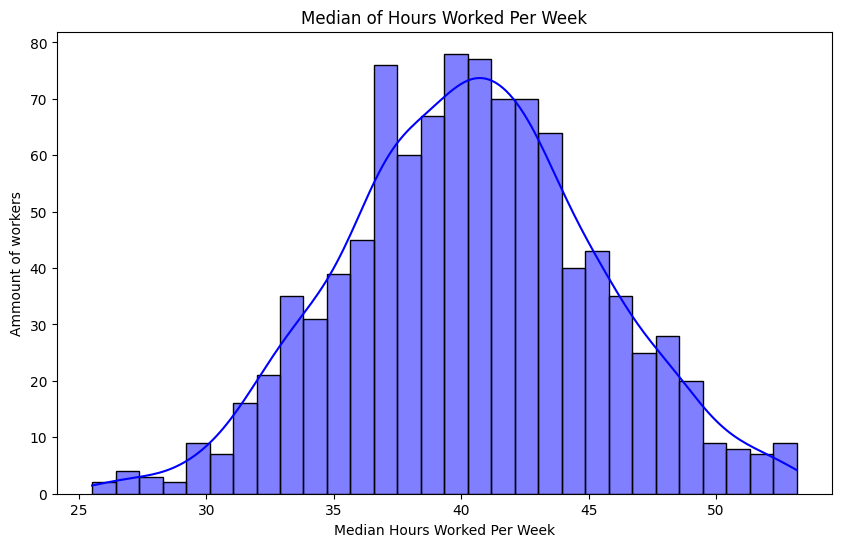

In [ ]:
import numpy as np
import pandas as pd

# Sample data generation for demonstration
np.random.seed(42)  # For reproducibility
data = pd.DataFrame({
    'Work_Location': np.random.choice(['Remote', 'Onsite', 'Hybrid'], 1000),
    'Hours_Worked_Per_Week': np.random.normal(loc=40, scale=5, size=1000),
    'Employee_Satisfaction': np.random.uniform(1, 10, size=1000)  # Satisfaction scores from 1 to 10
})
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Hours_Worked_Per_Week'], bins=30, kde=True, color='blue')
plt.title('Median of Hours Worked Per Week')
plt.xlabel('Median Hours Worked Per Week')
plt.ylabel('Ammount of workers')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in Mental Health Condition and Satisfaction of Remote Work
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Mental_Health_Condition', hue='Satisfaction_with_Remote_Work', palette='deep')
plt.title('Count of Mental Health Conditions by Satisfaction of Remote Work')
plt.xlabel('Mental Health Condition')
plt.ylabel('Amount Of Workers')
plt.legend(title='Satisfaction Level')
plt.show()


ValueError: Could not interpret value `Mental_Health_Conditions` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/impact_of_remote_work_mental_health.csv')  # Replace with your actual file path

# Display the first few rows and the columns
print(data.head())
print(data.columns)

# Drop rows with NaN in the relevant columns
data_cleaned = data.dropna(subset=['Mental_Health_Condition', 'Satisfaction_with_Remote_Work'])

# Create mapping for encoding
mental_health_mapping = {
    'None': 0,
    'Stress': 1,
    'Burnout': 2,
    'Depression': 3
}

satisfaction_mapping = {
    'Unsatisfied': 1,
    'Neutral': 2,
    'Satisfied': 3
}

# Apply the mapping to the DataFrame
data_cleaned['Mental_Health_Condition'] = data_cleaned['Mental_Health_Condition'].map(mental_health_mapping)
data_cleaned['Satisfaction_with_Remote_Work'] = data_cleaned['Satisfaction_with_Remote_Work'].map(satisfaction_mapping)

# Create a pivot table for the heatmap
heatmap_data = data_cleaned.pivot_table(
    index='Mental_Health_Condition',
    columns='Satisfaction_with_Remote_Work',
    values='Satisfaction_with_Remote_Work',
    aggfunc='count',
    fill_value=0
)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True, fmt='d')
plt.title('Heatmap of Mental Health Conditions vs. Satisfaction Levels of Remote Work')
plt.xlabel('Satisfaction Level')
plt.ylabel('Mental Health Condition')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2             

<ipython-input-37-588c3e0eaa96>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Mental_Health_Condition'] = data_cleaned['Mental_Health_Condition'].map(mental_health_mapping)
<ipython-input-37-588c3e0eaa96>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Satisfaction_with_Remote_Work'] = data_cleaned['Satisfaction_with_Remote_Work'].map(satisfaction_mapping)


ValueError: Grouper for 'Satisfaction_with_Remote_Work' not 1-dimensional

Part 4(a)

In [ ]:
# Importing libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv("/content/impact_of_remote_work_mental_health.csv")

# Select only hybrid workers
hybrid_workers = data[data['Work_Location'] == 'Hybrid']

# Select only onsite workers
onsite_workers = data[data['Work_Location'] == 'Onsite']

# Select only remote workers
remote_workers = data[data['Work_Location'] == 'Remote']

# Display the first few rows of remote workers dataset
print(remote_workers.head())

   Employee_ID  Age             Gender           Job_Role    Industry  \
1      EMP0002   40             Female     Data Scientist          IT   
6      EMP0007   31  Prefer not to say              Sales          IT   
10     EMP0011   33         Non-binary  Software Engineer     Finance   
12     EMP0013   40             Female          Marketing  Consulting   
14     EMP0015   36  Prefer not to say    Project Manager      Retail   

    Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
1                     3        Remote                     52   
6                    24        Remote                     51   
10                   17        Remote                     48   
12                    1        Remote                     21   
14                   23        Remote                     59   

    Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
1                            4                         1       Medium   
6                            7

Coefficients: [[-0.0021566  -0.00132171  0.04690809]
 [ 0.0012354   0.01220114 -0.01014015]]
Intercept: [2.91934606 2.87620534]
Mean Squared Error for Social Isolation rating: 1.8702555665382032
Mean Squared Error for Work Life Balance rating: 2.0256481290121795


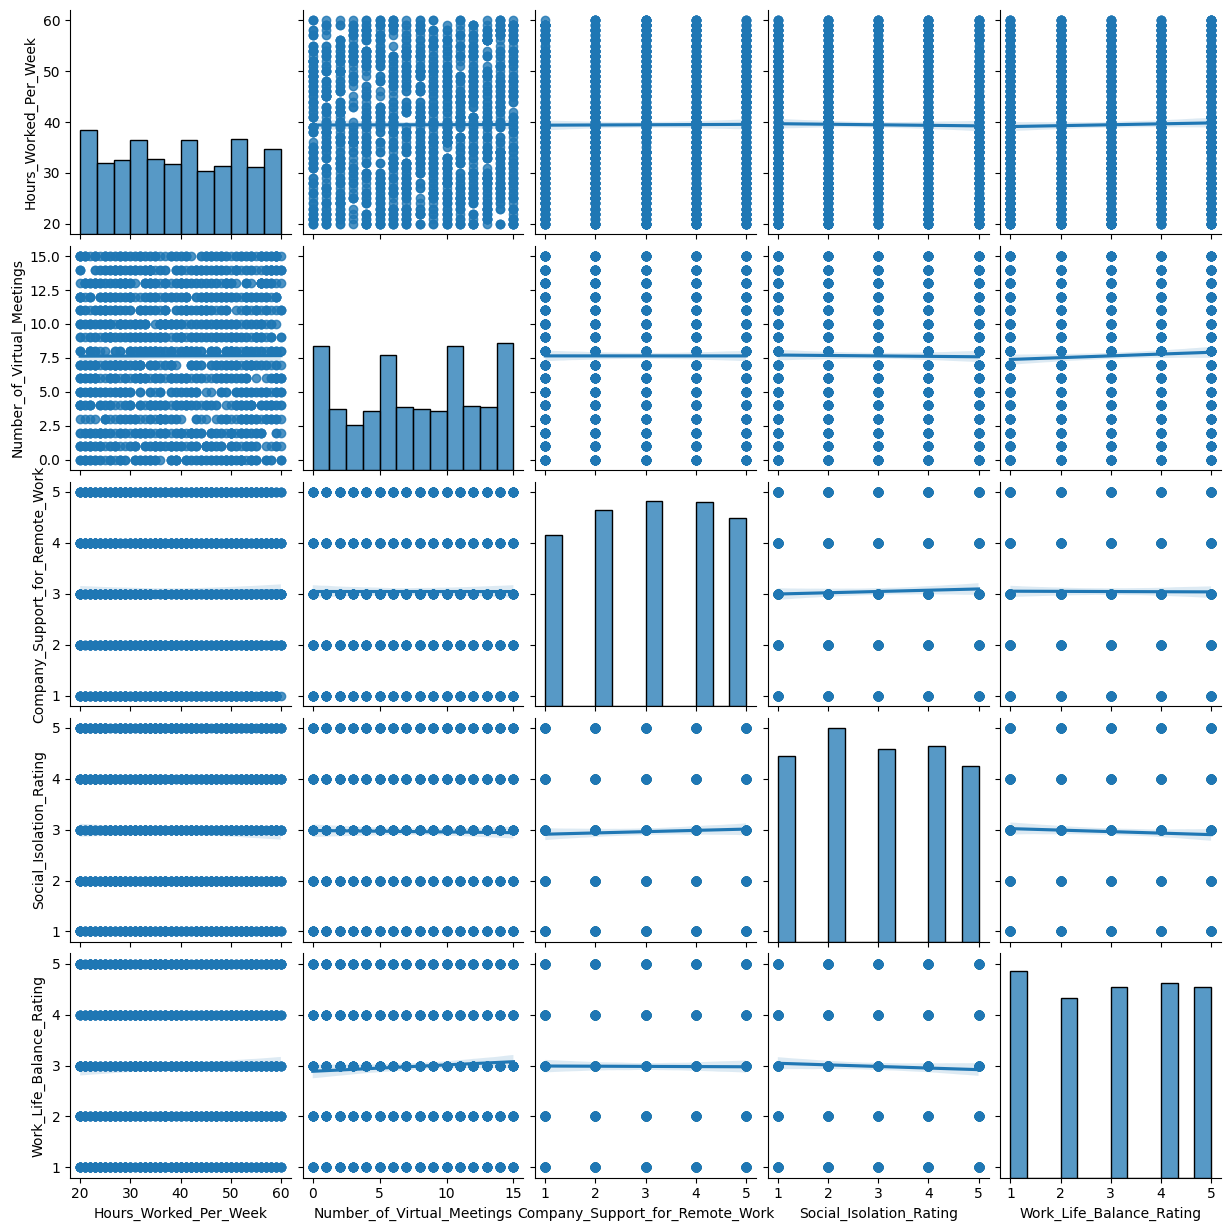

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# pairplot for remote workers
sns.pairplot(
    remote_workers,
    vars=['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Company_Support_for_Remote_Work', 'Social_Isolation_Rating', 'Work_Life_Balance_Rating'],
    kind='reg'
)

# Defining dependent and independent variables
X = remote_workers[['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Company_Support_for_Remote_Work']]  # Features
y = remote_workers[['Social_Isolation_Rating', 'Work_Life_Balance_Rating']]  # Target variables

# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Linear Regression model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = LinReg.predict(X_test)

# Calculating Mean Squared Error for both target variables
mse_sir = mean_squared_error(y_test['Social_Isolation_Rating'], y_pred[:, 0])
mse_WLBR = mean_squared_error(y_test['Work_Life_Balance_Rating'], y_pred[:, 1])

# Displaying coefficients, intercept, and Mean Squared Errors
print("Coefficients:", LinReg.coef_)
print("Intercept:", LinReg.intercept_)
print(f'Mean Squared Error for Social Isolation rating: {mse_sir}')
print(f'Mean Squared Error for Work Life Balance rating: {mse_WLBR}')

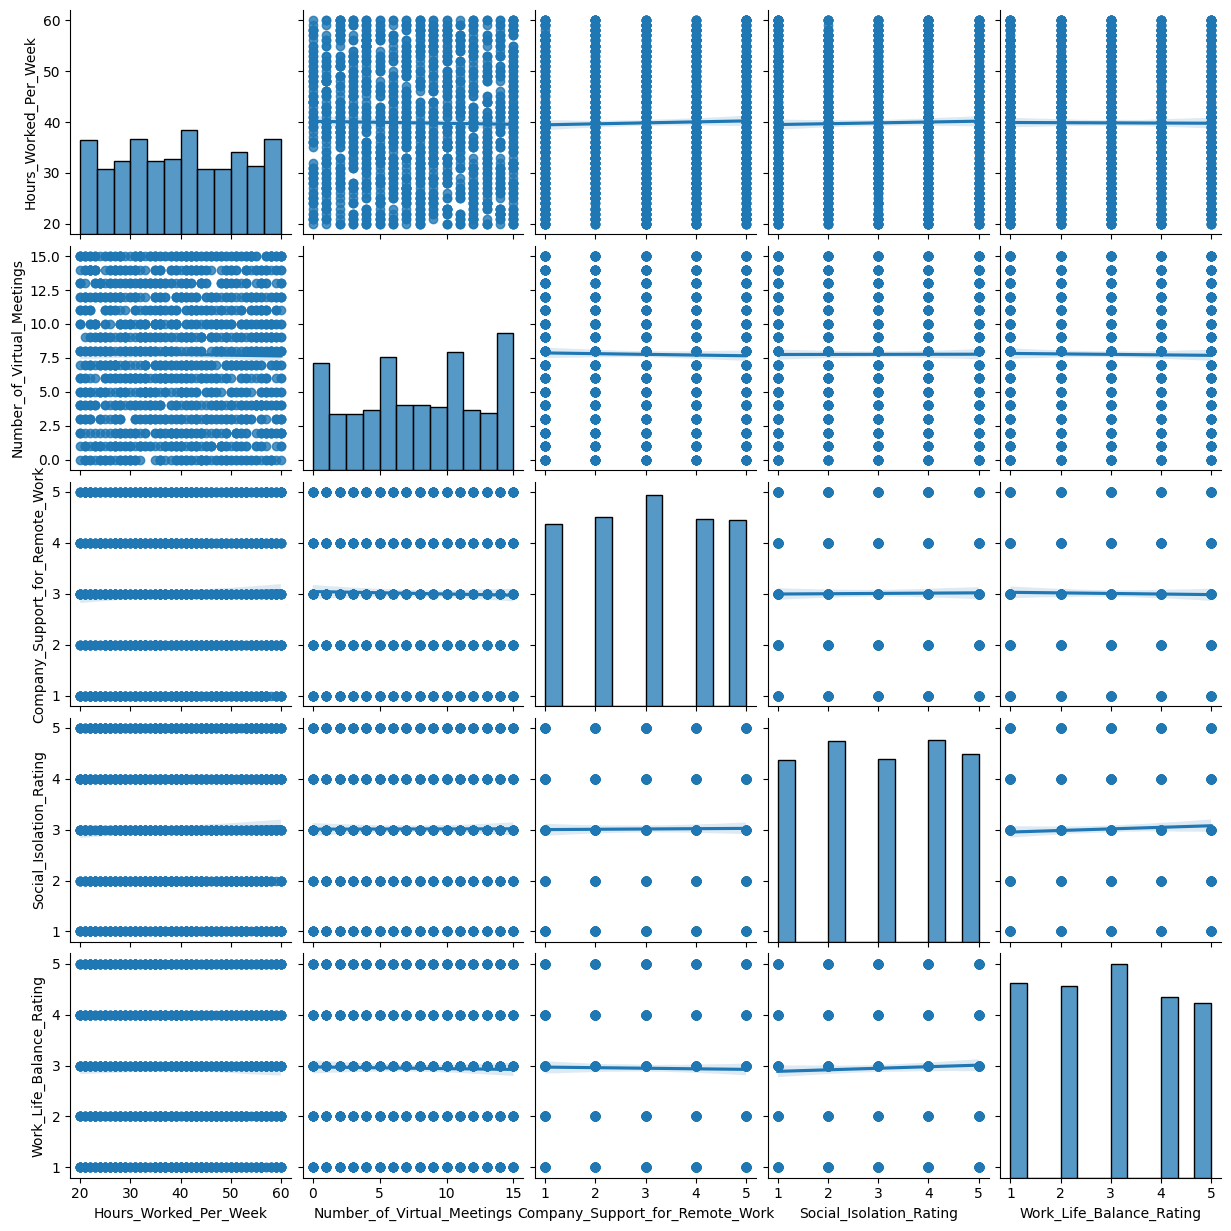

Coefficients: [[ 0.00101229 -0.00627422 -0.0153164 ]
 [ 0.00052074 -0.002804    0.0059282 ]]
Intercept: [3.05104053 2.93063408]
Mean Squared Error for Social Isolation rating: 1.9818710806188091
Mean Squared Error for Work Life Balance rating: 1.7980457813567756


In [ ]:
# Importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for onsite workers
sns.pairplot(
    onsite_workers,
    vars=['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Company_Support_for_Remote_Work', 'Social_Isolation_Rating', 'Work_Life_Balance_Rating'],
    kind='reg'
)
plt.show()  # Display the plot

# Defining dependent and independent variables
X = onsite_workers[['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Company_Support_for_Remote_Work']]  # Features
y = onsite_workers[['Social_Isolation_Rating', 'Work_Life_Balance_Rating']]  # Target variables

# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Linear Regression model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = LinReg.predict(X_test)

# Calculating Mean Squared Error for both target variables
mse_sir = mean_squared_error(y_test['Social_Isolation_Rating'], y_pred[:, 0])
mse_WLBR = mean_squared_error(y_test['Work_Life_Balance_Rating'], y_pred[:, 1])

# Displaying coefficients, intercept, and Mean Squared Errors
print("Coefficients:", LinReg.coef_)
print("Intercept:", LinReg.intercept_)
print(f'Mean Squared Error for Social Isolation rating: {mse_sir}')
print(f'Mean Squared Error for Work Life Balance rating: {mse_WLBR}')


Coefficients: [[-0.00137253  0.00185396  0.03464922]
 [ 0.00142862  0.00096203 -0.03222064]]
Intercept: [2.94576874 3.06058633]
Mean Squared Error for Social Isolation rating: 1.936853825608329
Mean Squared Error for Work Life Balance rating: 1.9421222864392156


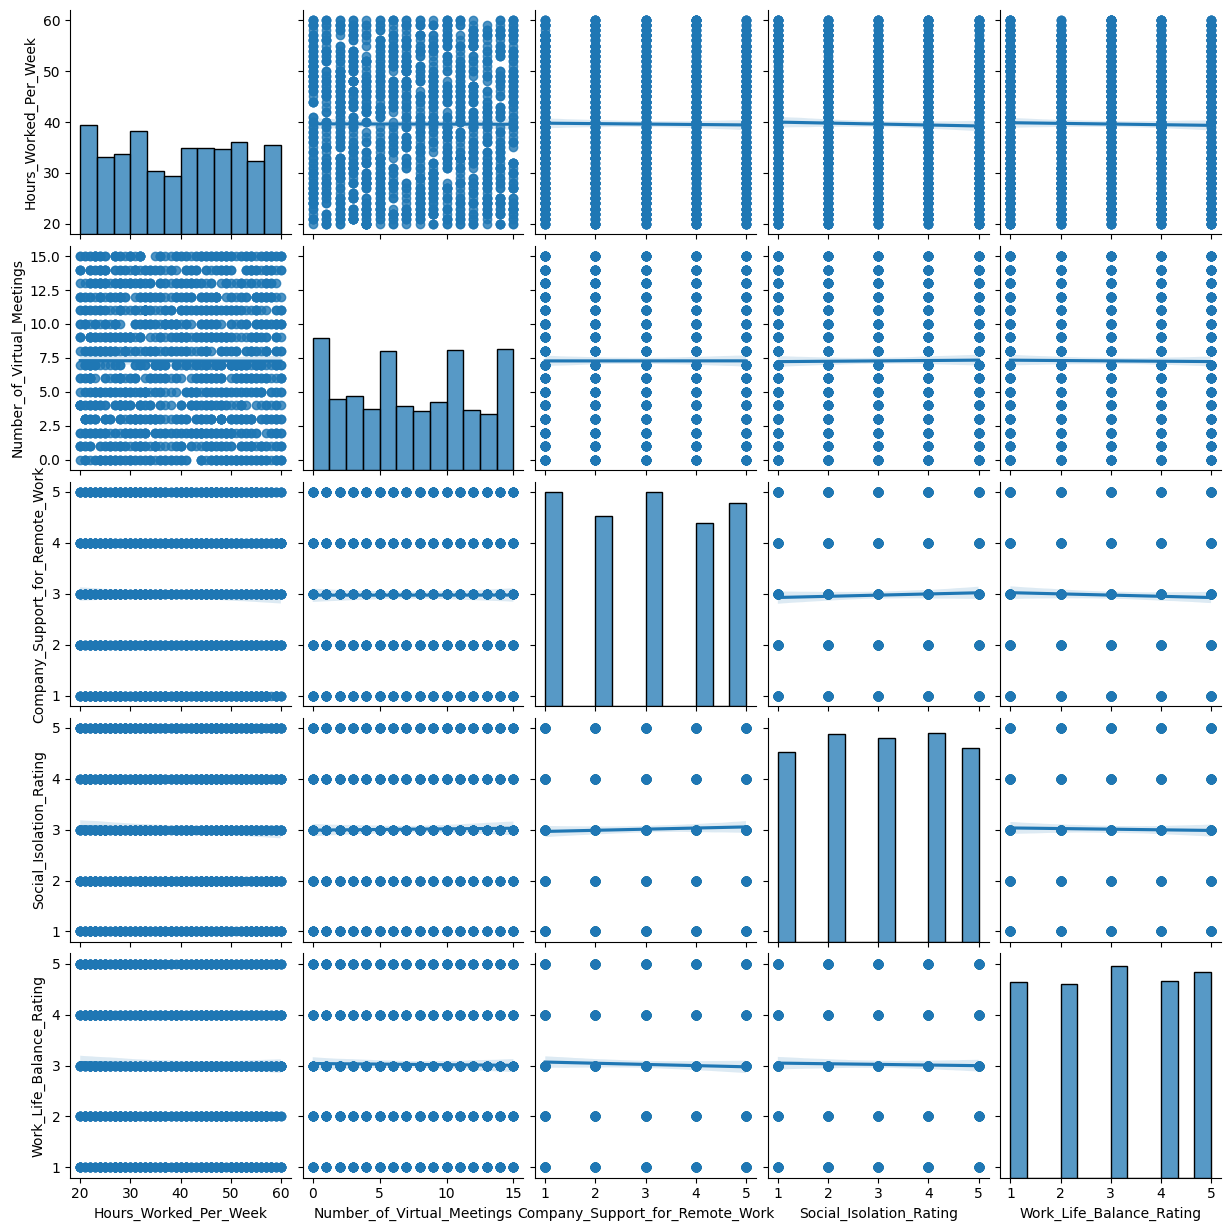

In [ ]:
# Pair plot for hybrid workers
sns.pairplot(
    hybrid_workers,
    vars=['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Company_Support_for_Remote_Work', 'Social_Isolation_Rating', 'Work_Life_Balance_Rating'],
    kind='reg'
)



# Defining dependent and independent variables
X = hybrid_workers[['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Company_Support_for_Remote_Work']]  # Features
y = hybrid_workers[['Social_Isolation_Rating', 'Work_Life_Balance_Rating']]  # Target variables

# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Linear Regression model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = LinReg.predict(X_test)

# Calculating Mean Squared Error for both target variables
mse_sir = mean_squared_error(y_test['Social_Isolation_Rating'], y_pred[:, 0])
mse_WLBR = mean_squared_error(y_test['Work_Life_Balance_Rating'], y_pred[:, 1])

# Displaying coefficients, intercept, and Mean Squared Errors
print("Coefficients:", LinReg.coef_)
print("Intercept:", LinReg.intercept_)
print(f'Mean Squared Error for Social Isolation rating: {mse_sir}')
print(f'Mean Squared Error for Work Life Balance rating: {mse_WLBR}')


In [ ]:
# Data for bar chart
data_bar = {
    'Worker_Type': ['Hybrid', 'Onsite', 'Remote'] * 2,
    'Dependent_Variable': ['Social Isolation Rating'] * 3 + ['Work Life Balance Rating'] * 3,
    'MSE': [
        1.936853825608329,  # Hybrid - Social Isolation
        1.9421222864392156, # Onsite - Social Isolation
        1.981871080618809,  # Remote - Social Isolation
        1.798045781356776,  # Hybrid - Work Life Balance
        1.8702555665382032, # Onsite - Work Life Balance
        2.0256481290121795   # Remote - Work Life Balance
    ]
}

# Creating a DataFrame from the data
df = pd.DataFrame(data_bar)

# Optionally, display the DataFrame to check its contents
print(df)

  Worker_Type        Dependent_Variable       MSE
0      Hybrid   Social Isolation Rating  1.936854
1      Onsite   Social Isolation Rating  1.942122
2      Remote   Social Isolation Rating  1.981871
3      Hybrid  Work Life Balance Rating  1.798046
4      Onsite  Work Life Balance Rating  1.870256
5      Remote  Work Life Balance Rating  2.025648


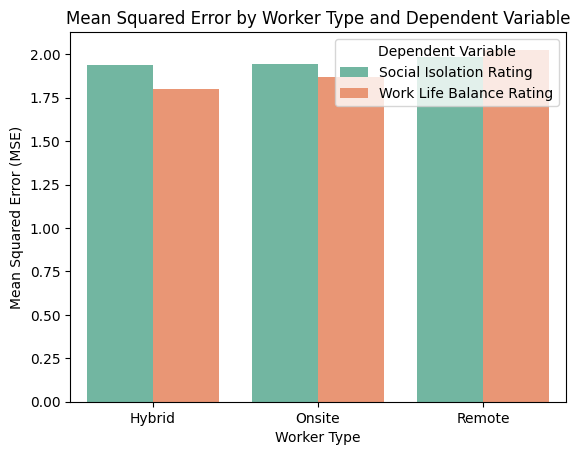

In [ ]:
sns.barplot(
    x='Worker_Type',
    y='MSE',
    hue='Dependent_Variable',
    data=df,  # Using df from the previous data preparation
    palette='Set2'
)

# Add titles and labels
plt.title('Mean Squared Error by Worker Type and Dependent Variable')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Worker Type')

# Show the plot
plt.legend(title='Dependent Variable')
plt.show()

In [ ]:
# Between the three work locations, which one has the highest stress level?
# Is there a difference between gender's stress levels at different work locations?

#### Filtering data
filtered_df = data[data['Gender'].isin(['Male', 'Female'])]


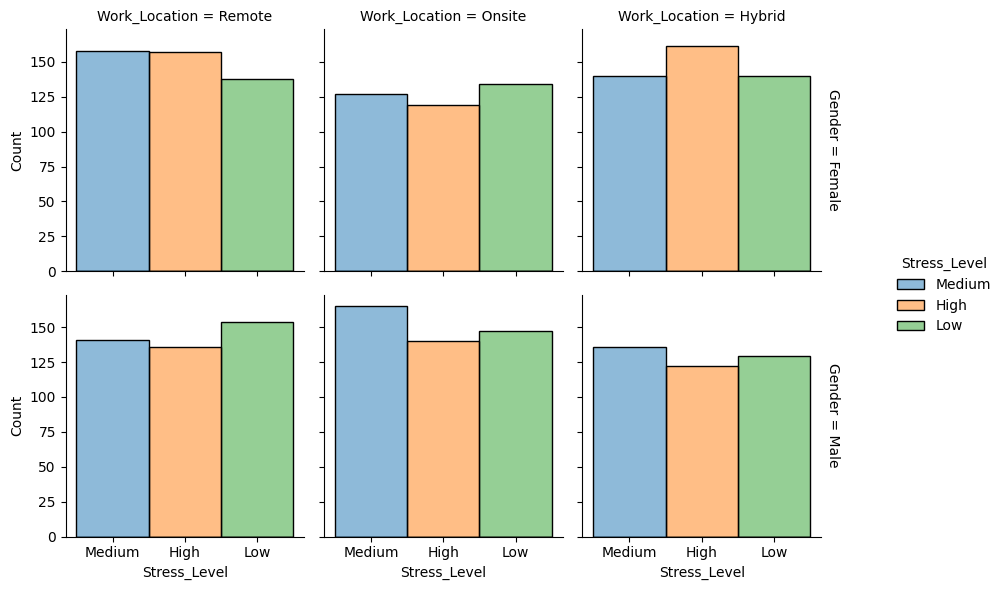

In [ ]:
#### visualizition of stress levels by work location and gender
sns.displot(
    filtered_df,
    x="Stress_Level",
    col="Work_Location",
    row="Gender",
    hue="Stress_Level",
    binwidth=3,
    height=3,
    facet_kws=dict(margin_titles=True)
)

# Show the plot
plt.show()

Part 4(b)

In [ ]:
import pandas as pd
impact_ = pd.read_csv("/content/impact_of_remote_work_mental_health.csv")
impact_.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


Text(0.5, 1.1, 'Percentage of Stress Levels by Mental Health Conditions')

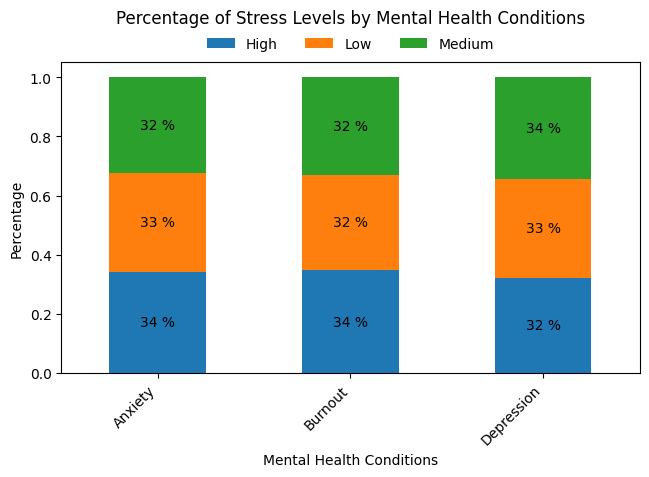

In [ ]:
x_var, y_var = "Mental_Health_Condition", "Stress_Level"
imp_stacked = impact_.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
imp_stacked.plot.bar(stacked=True)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
for ix, row in imp_stacked.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element == element and element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
plt.tight_layout()
plt.xlabel("Mental Health Conditions")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentage")
plt.title("Percentage of Stress Levels by Mental Health Conditions", y=1.10)

Text(0.5, 1.1, 'Hours Worked Per Week by Mental Health Conditions')

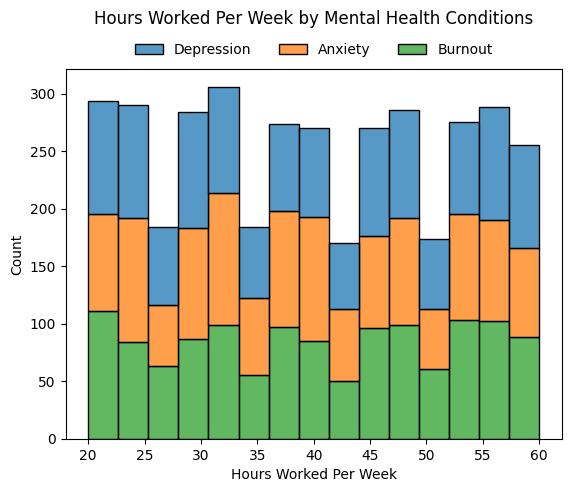

In [ ]:
impact_hist = sns.histplot(data=impact_, x="Hours_Worked_Per_Week", hue="Mental_Health_Condition", multiple="stack")
sns.move_legend(
    impact_hist, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
impact_hist.set_xlabel("Hours Worked Per Week")
impact_hist.set_ylabel("Count")
impact_hist.set_title("Hours Worked Per Week by Mental Health Conditions", y=1.10)

In [ ]:
dep_imp = impact_.loc[impact_['Mental_Health_Condition'] == 'Depression']
dep_imp.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe


Text(0.5, 1.1, 'Stress Level and Hours of Workers with Depression')

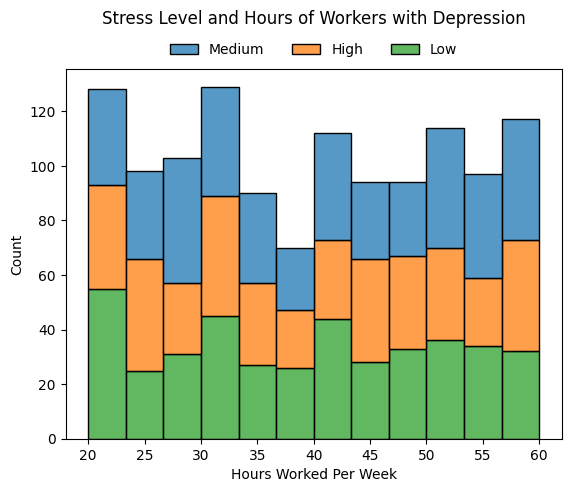

In [ ]:
dep_hist = sns.histplot(data=dep_imp, x="Hours_Worked_Per_Week",hue="Stress_Level", multiple="stack")
sns.move_legend(
    dep_hist, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
dep_hist.set_xlabel("Hours Worked Per Week")
dep_hist.set_ylabel("Count")
dep_hist.set_title("Stress Level and Hours of Workers with Depression", y=1.10)

In [ ]:
anx_imp = impact_.loc[impact_['Mental_Health_Condition'] == 'Anxiety']
anx_imp.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
13,EMP0014,51,Non-binary,Designer,Manufacturing,5,Hybrid,45,13,1,Low,Anxiety,No,Decrease,2,Satisfied,5,Weekly,Poor,North America
14,EMP0015,36,Prefer not to say,Project Manager,Retail,23,Remote,59,11,3,High,Anxiety,Yes,Decrease,5,Neutral,3,Weekly,Average,Oceania


Text(0.5, 1.1, 'Stress Level and Hours of Workers with Anxiety')

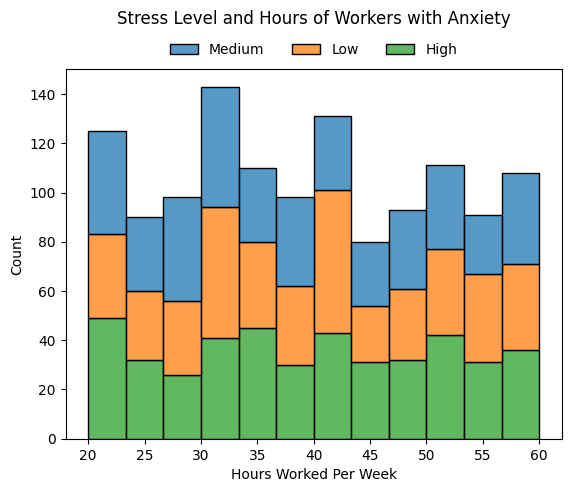

In [ ]:
anx_hist = sns.histplot(data=anx_imp, x="Hours_Worked_Per_Week",hue="Stress_Level", multiple="stack")
sns.move_legend(
    anx_hist, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
anx_hist.set_xlabel("Hours Worked Per Week")
anx_hist.set_ylabel("Count")
anx_hist.set_title("Stress Level and Hours of Workers with Anxiety",y=1.10)

In [ ]:
burn_imp = impact_.loc[impact_['Mental_Health_Condition'] == 'Burnout']
burn_imp.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
17,EMP0018,45,Non-binary,Data Scientist,Consulting,20,Onsite,37,8,3,Low,Burnout,Yes,Decrease,5,Neutral,5,Weekly,Good,Europe
20,EMP0021,26,Female,Sales,Retail,33,Hybrid,21,1,2,Low,Burnout,No,Increase,2,Satisfied,1,Weekly,Poor,South America
24,EMP0025,56,Male,Sales,Finance,6,Remote,54,15,3,Low,Burnout,No,Increase,2,Neutral,4,Daily,Average,North America
25,EMP0026,49,Male,Project Manager,Healthcare,23,Onsite,21,14,4,High,Burnout,No,No Change,4,Neutral,3,NaN,Good,South America
40,EMP0041,30,Non-binary,Data Scientist,IT,22,Remote,44,15,4,High,Burnout,No,Decrease,1,Neutral,5,Daily,Poor,Europe


Text(0.5, 1.1, 'Stress Level and Hours of Workers with Burnout')

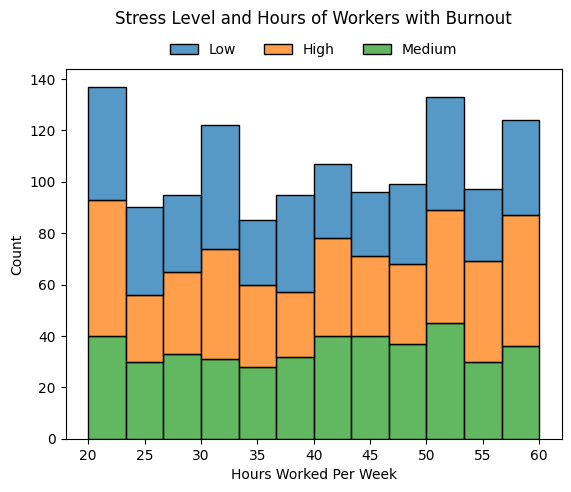

In [ ]:
burn_hist = sns.histplot(data=burn_imp, x="Hours_Worked_Per_Week",hue="Stress_Level", multiple="stack")
sns.move_legend(
    burn_hist, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
burn_hist.set_xlabel("Hours Worked Per Week")
burn_hist.set_ylabel("Count")
burn_hist.set_title("Stress Level and Hours of Workers with Burnout", y=1.10)

Text(0.5, 1.1, 'Stress Level Vs. Access to Mental Health Resources')

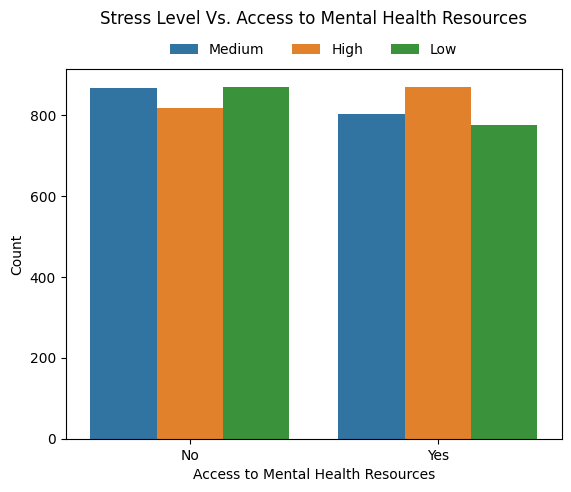

In [ ]:
access_ = sns.countplot(data=impact_, x="Access_to_Mental_Health_Resources", hue="Stress_Level")
sns.move_legend(
    access_, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
access_.set_xlabel("Access to Mental Health Resources")
access_.set_ylabel("Count")
access_.set_title("Stress Level Vs. Access to Mental Health Resources", y=1.10)


Part 5 & 6

In [ ]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = '/content/impact_of_remote_work_mental_health.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info to understand the structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

(  Employee_ID  Age      Gender           Job_Role    Industry  \
 0     EMP0001   32  Non-binary                 HR  Healthcare   
 1     EMP0002   40      Female     Data Scientist          IT   
 2     EMP0003   59  Non-binary  Software Engineer   Education   
 3     EMP0004   27        Male  Software Engineer     Finance   
 4     EMP0005   49        Male              Sales  Consulting   
 
    Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
 0                   13        Hybrid                     47   
 1                    3        Remote                     52   
 2                   22        Hybrid                     46   
 3                   20        Onsite                     32   
 4                   32        Onsite                     35   
 
    Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
 0                           7                         2       Medium   
 1                           4                         1       Medium 

In [ ]:
import numpy as np
import pandas as pd

# Define the work location and column to apply bootstrapping
work_location = 'Remote'  # Change to 'Onsite' or 'Hybrid' if needed
column = 'Hours_Worked_Per_Week'
sims = 1000  # Number of simulations
median_lengths = []

# Filter data for the specific work location
filtered_data = data[data['Work_Location'] == work_location]
Hours = data[column]

# Median of the column
Hours_median = np.median(Hours)

# Calculate 10% of the data size
sample_size = max(int(len(filtered_data) * 0.1), 1)

# Bootstrapping process
for i in range(sims):
    temp_sample = np.random.choice(Hours, replace=True, size=sample_size)
    sample_median = np.median(temp_sample)
    median_lengths.append(sample_median)

# Calculate bootstrapped median and 95% confidence interval
boot_median = np.median(median_lengths)
boot_95_ci = np.percentile(median_lengths, [2.5, 97.5])

# Print the results
print("Bootstrapped Median Hours Worked for {} = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(work_location, boot_median, boot_95_ci[0], boot_95_ci[1]))


Bootstrapped Median Hours Worked for Remote = 39.00, 95% CI = [36.00, 42.00]


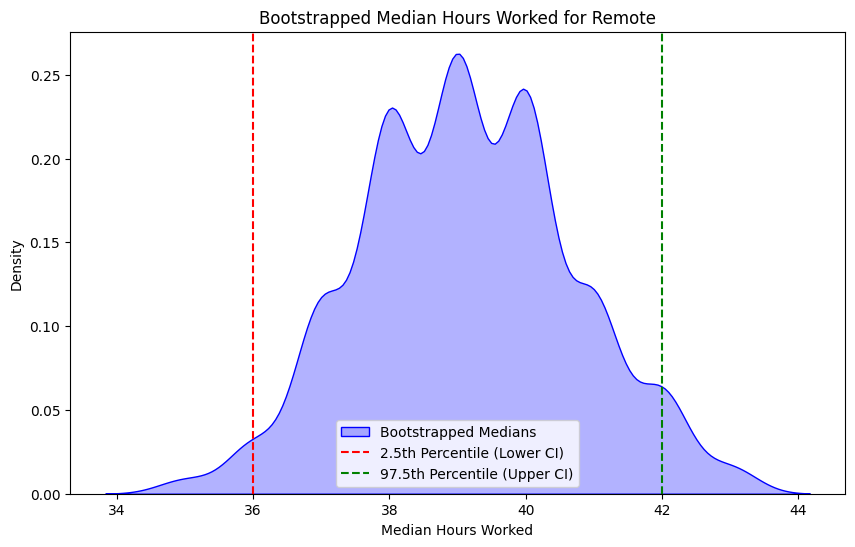

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the work location and column to apply bootstrapping
work_location = 'Remote'  # Change to 'Onsite' or 'Hybrid' if needed
column = 'Hours_Worked_Per_Week'
sims = 1000  # Number of simulations
median_lengths = []

# Filter data for the specific work location
filtered_data = data[data['Work_Location'] == work_location]
Hours = filtered_data[column]

# Calculate 10% of the data size
sample_size = max(int(len(filtered_data) * 0.1), 1)  # Ensure sample size is at least 1

# Bootstrapping process
for i in range(sims):
    temp_sample = np.random.choice(Hours, replace=True, size=sample_size)
    sample_median = np.median(temp_sample)
    median_lengths.append(sample_median)

# Calculate the 95% confidence interval
boot_95_ci = np.percentile(median_lengths, [2.5, 97.5])

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(median_lengths, color='blue', fill=True, alpha=0.3, label="Bootstrapped Medians")
plt.axvline(x=boot_95_ci[0], color='red', linestyle='--', label="2.5th Percentile (Lower CI)")
plt.axvline(x=boot_95_ci[1], color='green', linestyle='--', label="97.5th Percentile (Upper CI)")
plt.title(f"Bootstrapped Median Hours Worked for {work_location}")
plt.xlabel("Median Hours Worked")
plt.ylabel("Density")
plt.legend()
plt.show()